In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wbgapi as wb

In [2]:
countries = ['CHN', 'KOR', 'JPN']
indicators = {
    'NY.GDP.MKTP.CD': 'GDP',
    'NE.CON.PRVT.CD': 'Household_Consumption',
    'NE.GDI.TOTL.CD': 'Gross_Investment',
    'NE.CON.GOVT.CD': 'Government_Spending',
    'NE.EXP.GNFS.CD': 'Exports',
    'NE.IMP.GNFS.CD': 'Imports'
}

all_data = {}
for indicator_code, indicator_name in indicators.items():
    data = wb.data.DataFrame(indicator_code, countries, time=range(1970, 2023))
    all_data[indicator_name] = data
    
combined_data = pd.concat(all_data, axis=1)

In [5]:
print("Data Information:")
print(combined_data.info())

print("\nData Sample:")
print(combined_data.head())

Data Information:
<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, CHN to KOR
Columns: 318 entries, ('GDP', 'YR1970') to ('Imports', 'YR2022')
dtypes: float64(318)
memory usage: 7.5+ KB
None

Data Sample:
                  GDP                                                          \
               YR1970        YR1971        YR1972        YR1973        YR1974   
economy                                                                         
CHN      9.260263e+10  9.980059e+10  1.136893e+11  1.385432e+11  1.441890e+11   
JPN      2.172237e+11  2.453641e+11  3.249338e+11  4.414606e+11  4.900358e+11   
KOR      9.005145e+09  9.903571e+09  1.086221e+10  1.387647e+10  1.954397e+10   

                                                                               \
               YR1975        YR1976        YR1977        YR1978        YR1979   
economy                                                                         
CHN      1.634295e+11  1.539393e+11  1.749359e+11  1.49540

In [5]:
print("Data Type:")
print(combined_data.dtypes)

print("\nData Summary:")
print(combined_data.describe())

Data Type:
GDP      YR1970    float64
         YR1971    float64
         YR1972    float64
         YR1973    float64
         YR1974    float64
                    ...   
Imports  YR2018    float64
         YR2019    float64
         YR2020    float64
         YR2021    float64
         YR2022    float64
Length: 318, dtype: object

Data Summary:
                GDP                                                          \
             YR1970        YR1971        YR1972        YR1973        YR1974   
count  3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00   
mean   1.062771e+11  1.183561e+11  1.498285e+11  1.979601e+11  2.179229e+11   
std    1.047806e+11  1.188219e+11  1.601243e+11  2.198973e+11  2.437584e+11   
min    9.005145e+09  9.903571e+09  1.086221e+10  1.387647e+10  1.954397e+10   
25%    5.080389e+10  5.485208e+10  6.227576e+10  7.620982e+10  8.186647e+10   
50%    9.260263e+10  9.980059e+10  1.136893e+11  1.385432e+11  1.441890e+11   
75%    1.549131e+1

In [7]:
# Data Cleaning
# Check missing values

combined_data.isnull().sum()

GDP      YR1970    0
         YR1971    0
         YR1972    0
         YR1973    0
         YR1974    0
                  ..
Imports  YR2018    0
         YR2019    0
         YR2020    0
         YR2021    0
         YR2022    0
Length: 318, dtype: int64

In [9]:
# check duplicated data

combined_data.duplicated().sum()

0

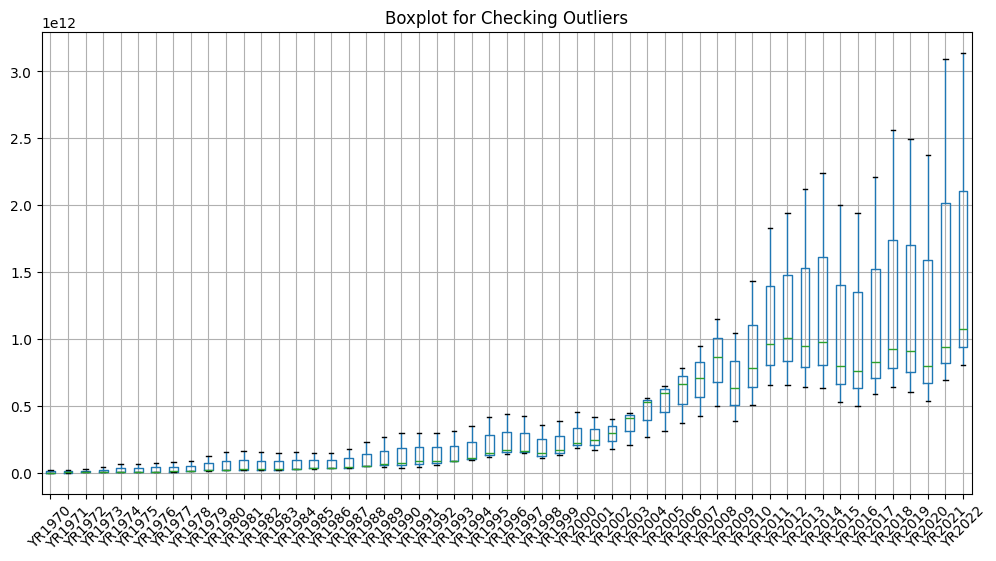


Number of Outliers:
YR1970    0
YR1971    0
YR1972    0
YR1973    0
YR1974    0
YR1975    0
YR1976    0
YR1977    0
YR1978    0
YR1979    0
YR1980    0
YR1981    0
YR1982    0
YR1983    0
YR1984    0
YR1985    0
YR1986    0
YR1987    0
YR1988    0
YR1989    0
YR1990    0
YR1991    0
YR1992    0
YR1993    0
YR1994    0
YR1995    0
YR1996    0
YR1997    0
YR1998    0
YR1999    0
YR2000    0
YR2001    0
YR2002    0
YR2003    0
YR2004    0
YR2005    0
YR2006    0
YR2007    0
YR2008    0
YR2009    0
YR2010    0
YR2011    0
YR2012    0
YR2013    0
YR2014    0
YR2015    0
YR2016    0
YR2017    0
YR2018    0
YR2019    0
YR2020    0
YR2021    0
YR2022    0
dtype: int64


In [9]:
# check outliers

# Boxplot
plt.figure(figsize=(12, 6))
data.select_dtypes(include=['float64', 'int64']).boxplot()
plt.title("Boxplot for Checking Outliers")
plt.xticks(rotation=45)
plt.show()

# IQR Method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))

print("\nNumber of Outliers:")
print(outliers.sum())

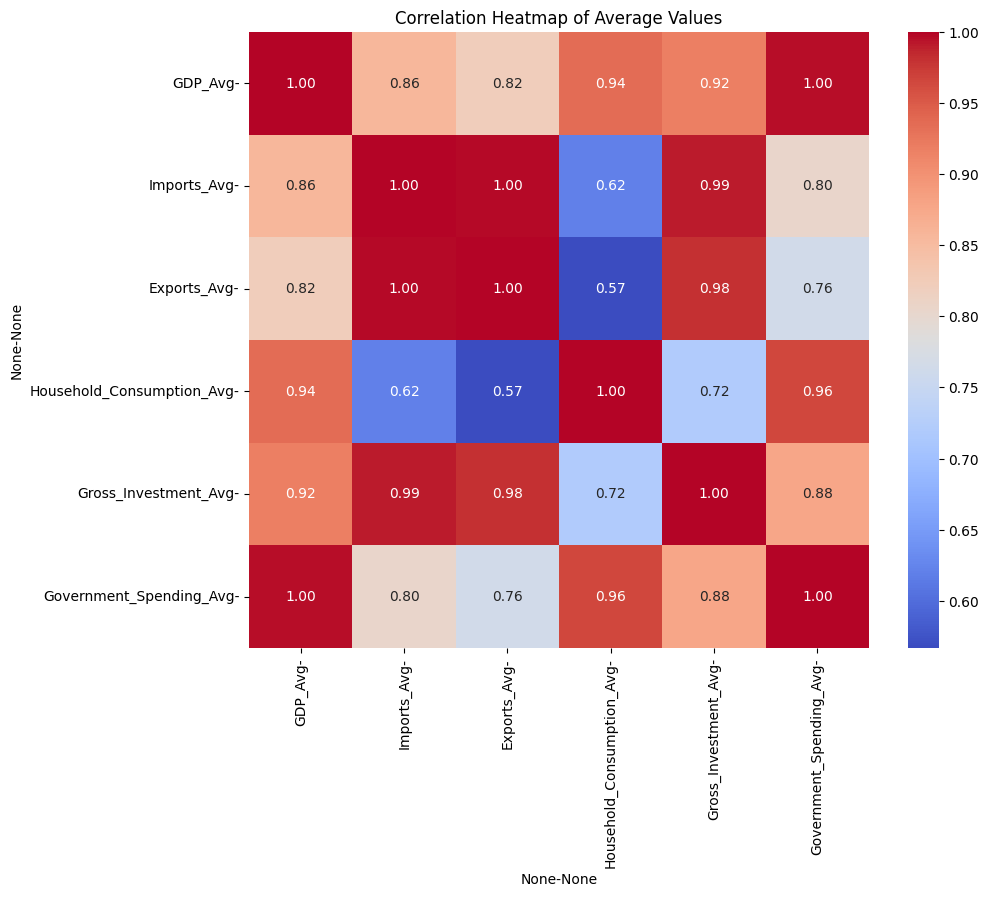

In [10]:
combined_data['GDP_Avg'] = combined_data.filter(like='GDP').mean(axis=1)
combined_data['Imports_Avg'] = combined_data.filter(like='Imports').mean(axis=1)
combined_data['Exports_Avg'] = combined_data.filter(like='Exports').mean(axis=1)
combined_data['Household_Consumption_Avg'] = combined_data.filter(like='Household_Consumption').mean(axis=1)
combined_data['Gross_Investment_Avg'] = combined_data.filter(like='Gross_Investment').mean(axis=1)
combined_data['Government_Spending_Avg'] = combined_data.filter(like='Government_Spending').mean(axis=1)

avg_columns = [
    'GDP_Avg', 'Imports_Avg', 'Exports_Avg',
    'Household_Consumption_Avg', 'Gross_Investment_Avg', 'Government_Spending_Avg'
]

correlation_matrix = combined_data[avg_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Average Values")
plt.show()


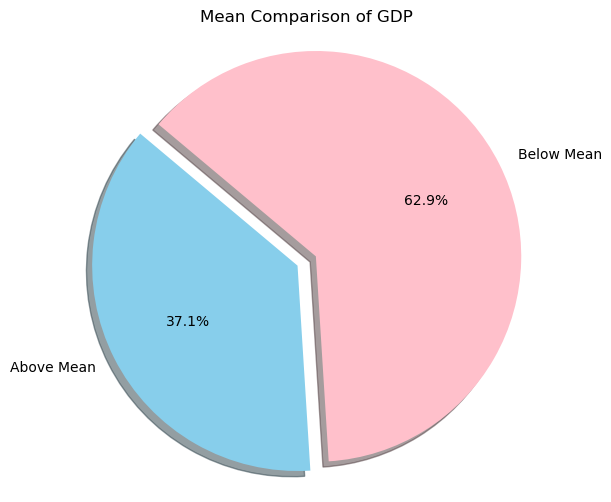

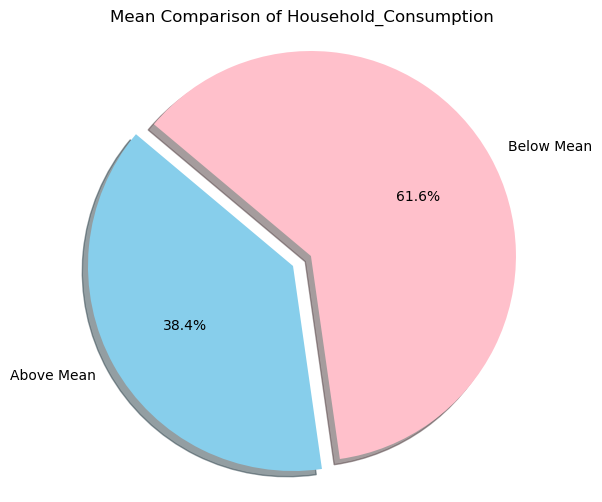

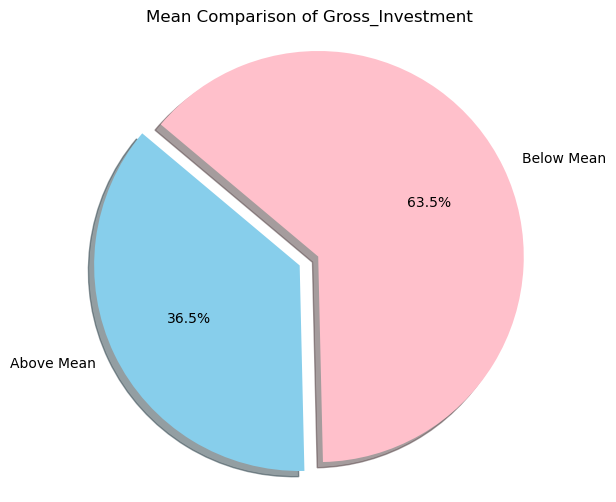

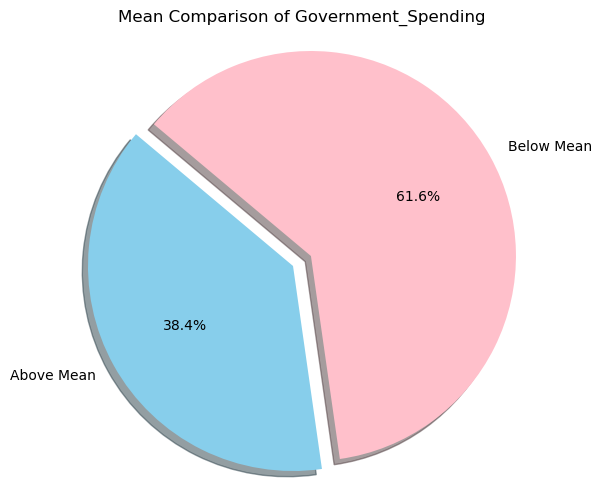

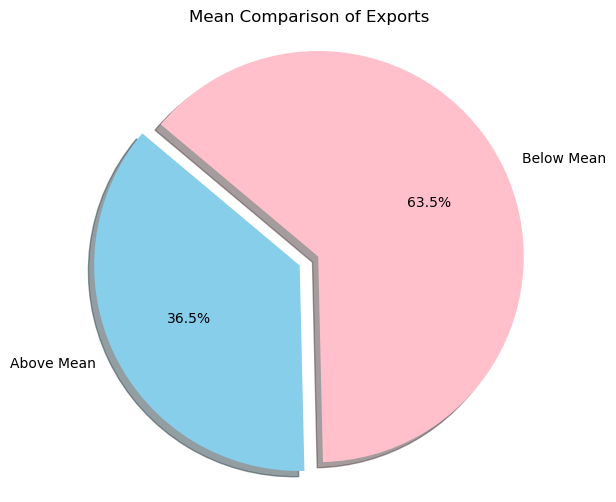

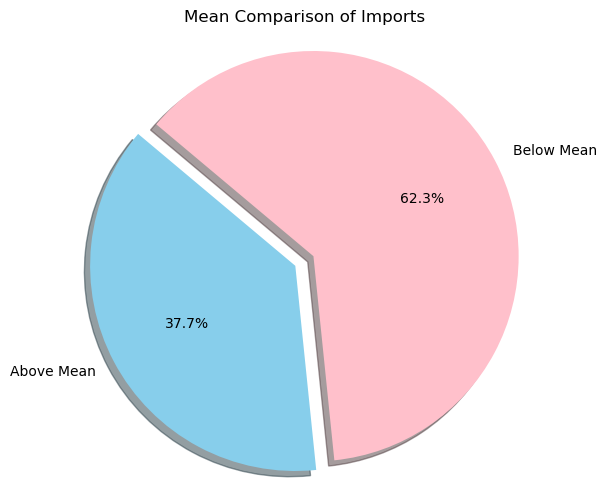

In [11]:
# pie chart for each indicator

for indicator in indicators.values():
    above_mean = (combined_data[indicator] >= combined_data[indicator].mean()).sum().sum()
    below_mean = (combined_data[indicator] < combined_data[indicator].mean()).sum().sum()

    labels = ['Above Mean', 'Below Mean']
    sizes = [above_mean, below_mean]
    colors = ['skyblue', 'pink']
    explode = (0.1, 0)

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title(f"Mean Comparison of {indicator}")
    plt.axis('equal')
    plt.show()

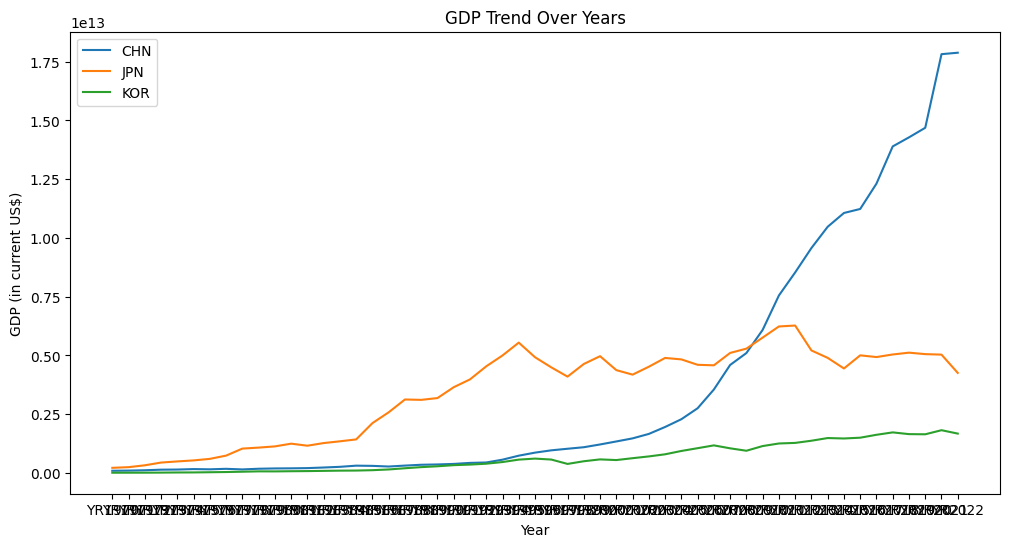

In [12]:
# GDP trend over years

plt.figure(figsize=(12, 6))
for country in ['CHN', 'JPN', 'KOR']:
    plt.plot(combined_data.loc[country, 'GDP'], label=country)
plt.title("GDP Trend Over Years")
plt.xlabel("Year")
plt.ylabel("GDP (in current US$)")
plt.legend()
plt.show()

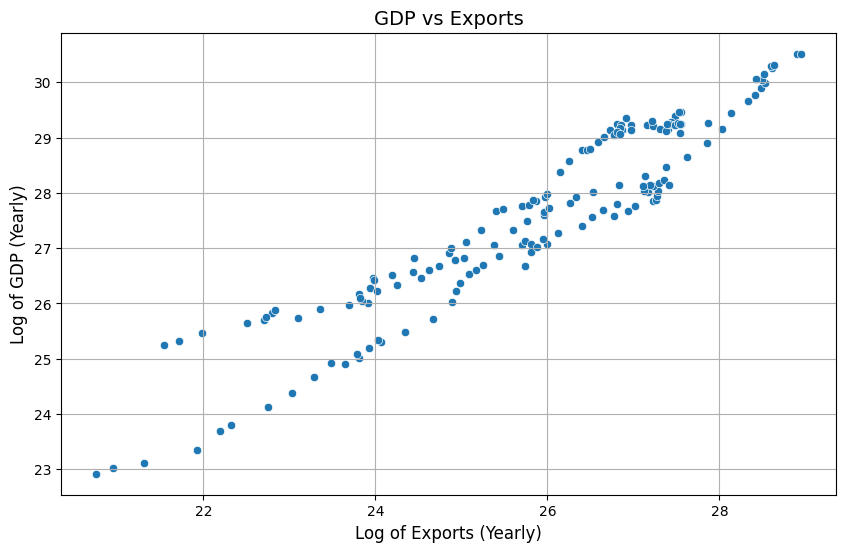

In [15]:
combined_data.columns = ['_'.join(map(str, col)) if isinstance(col, tuple) else col for col in combined_data.columns]

gdp_data = combined_data.filter(like='GDP_')
exports_data = combined_data.filter(like='Exports_')

gdp_data.columns = [col.split('_')[1] for col in gdp_data.columns]
exports_data.columns = [col.split('_')[1] for col in exports_data.columns]

gdp_data = gdp_data.T.reset_index()
gdp_data.columns = ['Year'] + [f'Country_{i}' for i in range(1, gdp_data.shape[1])]

exports_data = exports_data.T.reset_index()
exports_data.columns = ['Year'] + [f'Country_{i}' for i in range(1, exports_data.shape[1])]

gdp_data = gdp_data[~gdp_data['Year'].str.contains('Avg|Total')]
exports_data = exports_data[~exports_data['Year'].str.contains('Avg|Total')]

gdp_data_long = gdp_data.melt(id_vars='Year', var_name='Country', value_name='GDP')
exports_data_long = exports_data.melt(id_vars='Year', var_name='Country', value_name='Exports')

yearly_data = pd.merge(gdp_data_long, exports_data_long, on=['Year', 'Country'])

yearly_data['GDP_Log'] = np.log1p(yearly_data['GDP'])
yearly_data['Exports_Log'] = np.log1p(yearly_data['Exports'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Exports_Log', y='GDP_Log', data=yearly_data)
plt.title("GDP vs Exports", fontsize=14)
plt.xlabel("Log of Exports (Yearly)", fontsize=12)
plt.ylabel("Log of GDP (Yearly)", fontsize=12)
plt.grid(True)
plt.show()

## ARIMA MODEL

Original GDP ADF Statistic: -0.26161393042909437 p-value: 0.9307677427718574


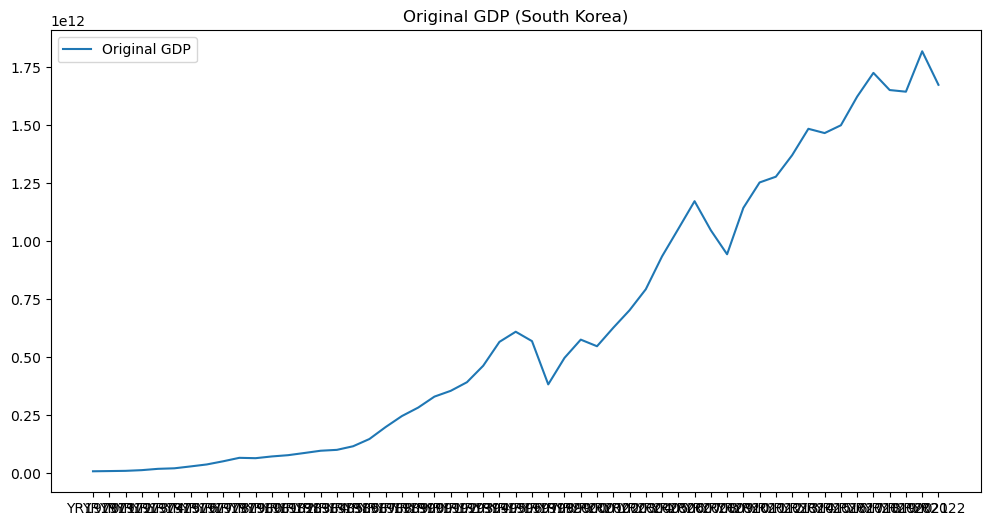

The original series is non-stationary. Proceeding with first differencing.
First Differencing ADF Statistic: -1.7343899037329837 p-value: 0.4134865012707408


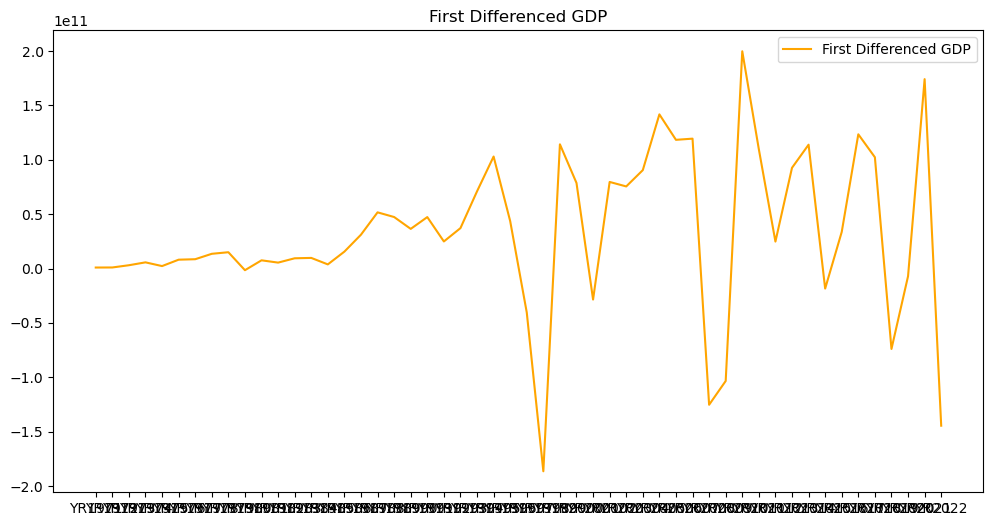

The first differenced series is still non-stationary. Proceeding with second differencing.
Second Differencing ADF Statistic: -4.21903872385067 p-value: 0.0006116748862785833


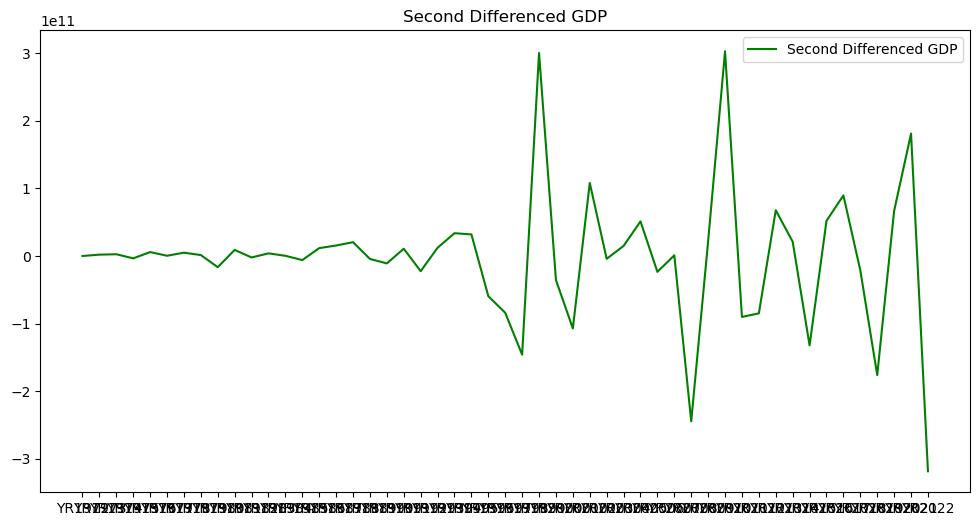

The second differenced series is stationary. The data is ready for modeling.


In [49]:
from statsmodels.tsa.stattools import adfuller


# Extract GDP data for South Korea
KOR_GDP = combined_data.loc['KOR', 'GDP']

# Test stationarity of the original series
result = adfuller(KOR_GDP)
print("Original GDP ADF Statistic:", result[0], "p-value:", result[1])
plt.figure(figsize=(12, 6))
plt.plot(KOR_GDP, label='Original GDP')
plt.title("Original GDP (South Korea)")
plt.legend()
plt.show()
if result[1] > 0.05:
    print("The original series is non-stationary. Proceeding with first differencing.")

# First differencing
gdp_diff = KOR_GDP.diff().dropna()
result_diff = adfuller(gdp_diff)
print("First Differencing ADF Statistic:", result_diff[0], "p-value:", result_diff[1])
plt.figure(figsize=(12, 6))
plt.plot(gdp_diff, label='First Differenced GDP', color='orange')
plt.title("First Differenced GDP")
plt.legend()
plt.show()
if result_diff[1] > 0.05:
    print("The first differenced series is still non-stationary. Proceeding with second differencing.")

# Second differencing
gdp_diff2 = gdp_diff.diff().dropna()
result_diff2 = adfuller(gdp_diff2)
print("Second Differencing ADF Statistic:", result_diff2[0], "p-value:", result_diff2[1])
plt.figure(figsize=(12, 6))
plt.plot(gdp_diff2, label='Second Differenced GDP', color='green')
plt.title("Second Differenced GDP")
plt.legend()
plt.show()
if result_diff2[1] < 0.05:
    print("The second differenced series is stationary. The data is ready for modeling.")



<Figure size 1200x600 with 0 Axes>

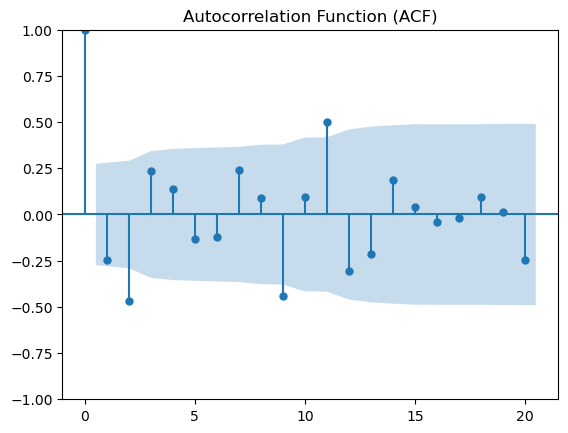

<Figure size 1200x600 with 0 Axes>

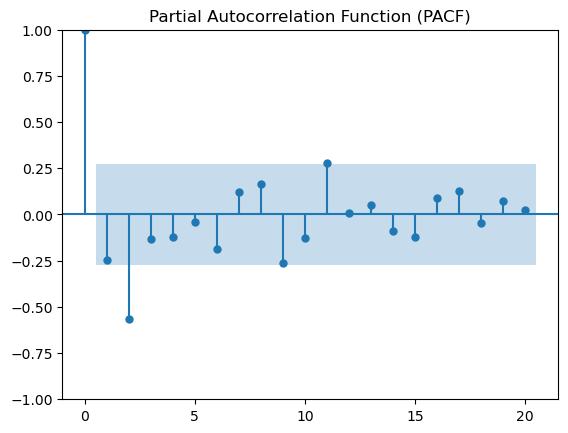

In [55]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf


stationary_series = gdp_diff2

# Plot ACF to identify MA terms
plt.figure(figsize=(12, 6))
plot_acf(stationary_series, lags=20)  
plt.title("Autocorrelation Function (ACF)")
plt.show()

# Plot PACF to identify AR terms
plt.figure(figsize=(12, 6))
plot_pacf(stationary_series, lags=20,  method='ywm')  
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()


In [72]:
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(stationary_series, order=(2, 2, 1))
arima_result = arima_model.fit()
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                    KOR   No. Observations:                   51
Model:                 ARIMA(2, 2, 1)   Log Likelihood               -1319.269
Date:                Fri, 10 Jan 2025   AIC                           2646.538
Time:                        23:19:13   BIC                           2654.105
Sample:                             0   HQIC                          2649.409
                                 - 51                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6535      0.202     -3.232      0.001      -1.050      -0.257
ar.L2         -0.7655      0.194     -3.940      0.000      -1.146      -0.385
ma.L1         -0.9676      0.213     -4.534      0.0

Ljung-Box Test Results:
       lb_stat  lb_pvalue
10  14.110867   0.167994


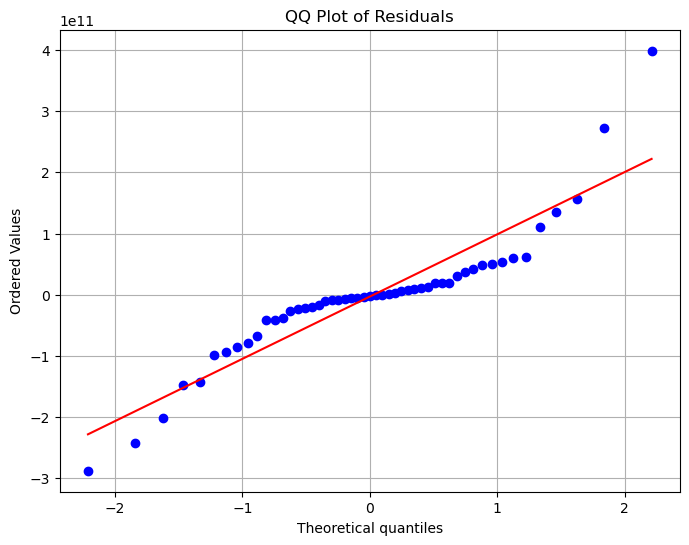

In [78]:
from statsmodels.stats.diagnostic import acorr_ljungbox
import scipy.stats as stats
residuals = arima_result.resid
ljungbox_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box Test Results:\n", ljungbox_test)
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt) 
plt.title("QQ Plot of Residuals")
plt.grid(True)
plt.show()

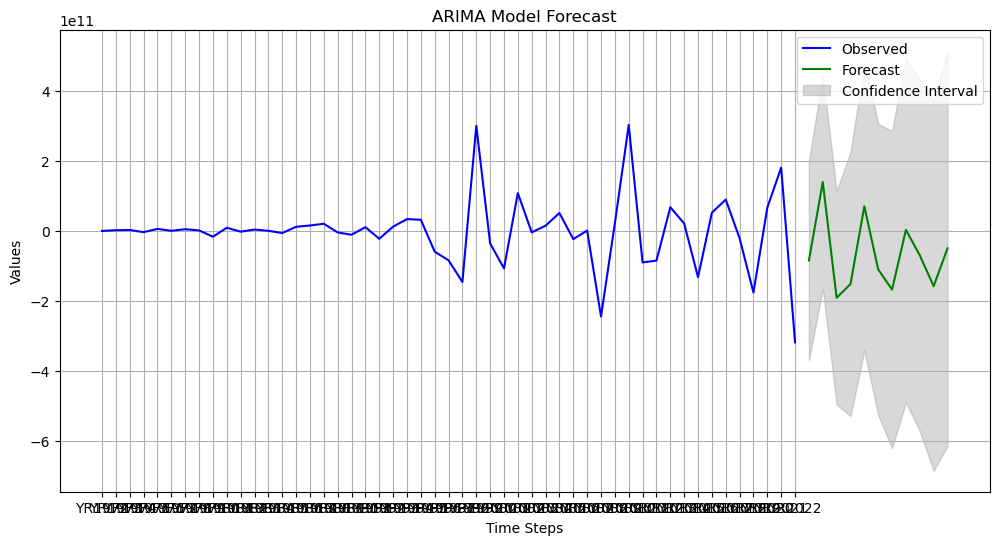

In [82]:

# Use ARIMA model for forecasting
forecast_steps = 11  # Forecast the next 11 steps
forecast_result = arima_result.get_forecast(steps=forecast_steps)
forecast_mean = forecast_result.predicted_mean  # Predicted mean values
forecast_ci = forecast_result.conf_int()  # Confidence intervals

# Create visualization
plt.figure(figsize=(12, 6))
plt.plot(stationary_series, label="Observed", color="blue")  # Actual data
plt.plot(
    np.arange(len(stationary_series), len(stationary_series) + forecast_steps),
    forecast_mean,
    label="Forecast",
    color="green",
)  # Forecasted values
plt.fill_between(
    np.arange(len(stationary_series), len(stationary_series) + forecast_steps),
    forecast_ci.iloc[:, 0],
    forecast_ci.iloc[:, 1],
    color="gray",
    alpha=0.3,
    label="Confidence Interval",
)  # Confidence intervals
plt.title("ARIMA Model Forecast")
plt.xlabel("Time Steps")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()

